In [1]:
import stingray as st
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

pnhdu = fits.open('0886040201_PN1_dt5.lc')
m1hdu = fits.open('0886040201_M11_dt5.lc')
m2hdu = fits.open('0886040201_M21_dt5.lc')

In [2]:
pn_time = pnhdu[1].data.field('TIME')
pn_rate = pnhdu[1].data.field('RATE')
pn_rerr = pnhdu[1].data.field('ERROR')
m1_time = m1hdu[1].data.field('TIME')
m1_rate = m1hdu[1].data.field('RATE')
m1_rerr = m1hdu[1].data.field('ERROR')
m2_time = m2hdu[1].data.field('TIME')
m2_rate = m2hdu[1].data.field('RATE')
m2_rerr = m2hdu[1].data.field('ERROR')

pngtis = []
for i in pnhdu['SRC_GTIS'].data:
    pngtis.append([i[0],i[1]])
    
m1gtis = []
for i in m1hdu['SRC_GTIS'].data:
    m1gtis.append([i[0],i[1]])
    
m2gtis = []
for i in m2hdu['SRC_GTIS'].data:
    m2gtis.append([i[0],i[1]])

In [6]:
pnlc = st.Lightcurve(pn_time,pn_rate,pn_rerr,gti=pngtis)
m1lc = st.Lightcurve(m1_time,m1_rate,m1_rerr,gti=pngtis)
m2lc = st.Lightcurve(m2_time,m2_rate,m2_rerr,gti=pngtis)

/home/rwebbe/.local/lib/python3.8/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")


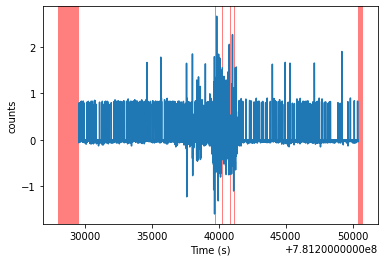

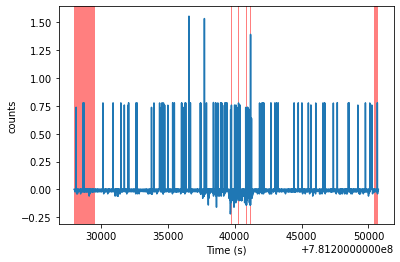

<AxesSubplot:xlabel='Time (s)', ylabel='counts'>

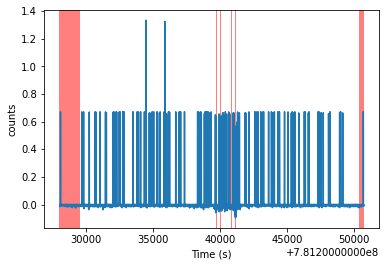

In [7]:
pnlc.plot()
plt.show()
m1lc.plot()
plt.show()
m2lc.plot()

In [8]:
m1lc = m1lc.rebin(10)
m2lc = m2lc.rebin(10)
pnlc = pnlc.rebin(10)

In [9]:
all_lc = m1lc + m2lc + pnlc

<AxesSubplot:xlabel='Time (s)', ylabel='counts'>

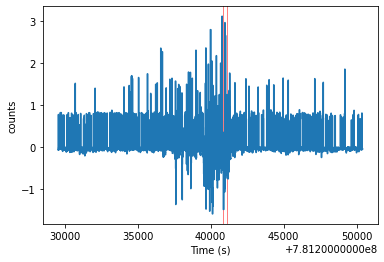

In [10]:
all_lc.plot()

<AxesSubplot:xlabel='Time (s)', ylabel='counts'>

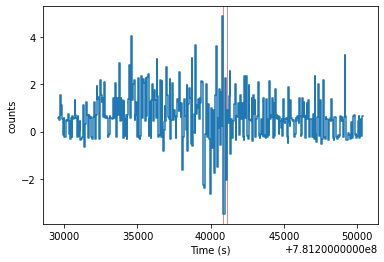

In [11]:
all_lc.rebin(50).plot()

<AxesSubplot:xlabel='Time (s)', ylabel='counts'>

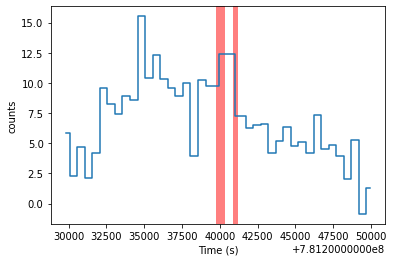

In [13]:
all_lc.rebin(500).plot()